# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from project_env import ProjectEnv
import numpy as np

import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

plt.ion()

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
#env = UnityEnvironment(file_name="./Banana_Linux/Banana.x86_64")
env = ProjectEnv("./Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_name

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [4]:
# env_info = env.reset(train_mode=False)[brain_name] # reset the environment
# state = env_info.vector_observations[0]            # get the current state
# score = 0                                          # initialize the score
# while True:
#     action = np.random.randint(action_size)        # select an action
#     env_info = env.step(action)[brain_name]        # send the action to the environment
#     next_state = env_info.vector_observations[0]   # get the next state
#     reward = env_info.rewards[0]                   # get the reward
#     done = env_info.local_done[0]                  # see if episode has finished
#     score += reward                                # update the score
#     state = next_state                             # roll over the state to next time step
#     if done:                                       # exit loop if episode finished
#         break
    
# print("Score: {}".format(score))

When finished, you can close the environment.

In [5]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [8]:
from dqn_agent import *
from utils import mini_batch_train

n_episodes = 1800
max_t = 2000
eps_start = 1.0
eps_end = 0.1
eps_decay = 0.995

# train the agent
agents = {}
stats = {}
for update_type in ['dqn', 'ddqn', 'dueling']:
    agent = DQNAgent(env.state_size, env.action_size, update_type)
    
    print('Running DQNAgent ({})'.format(update_type))
    scores = mini_batch_train(env, agent, max_episodes=n_episodes, max_steps=max_t, batch_size=64)
    
    agents[update_type] = agent
    stats[update_type] = scores

Running DQNAgent (dqn)
Episode 0 	Average score:  1.00
Episode 100 	Average score:  0.76
Episode 200 	Average score:  4.13
Episode 300 	Average score:  7.78
Episode 400 	Average score:  10.99
Episode 500 	Average score:  12.05
Episode 530 	Average score:  13.03
Environment solved in  430 episodes!	Average Score:  13.03
Running DQNAgent (ddqn)
Episode 0 	Average score:  1.00
Episode 100 	Average score:  0.70
Episode 200 	Average score:  4.39
Episode 300 	Average score:  7.05
Episode 400 	Average score:  10.28
Episode 500 	Average score:  12.55
Episode 536 	Average score:  13.00
Environment solved in  436 episodes!	Average Score:  13.00
Running DQNAgent (dueling)
Episode 0 	Average score:  0.00
Episode 100 	Average score:  1.14
Episode 200 	Average score:  4.39
Episode 300 	Average score:  6.97
Episode 400 	Average score:  10.38
Episode 485 	Average score:  13.01
Environment solved in  385 episodes!	Average Score:  13.01


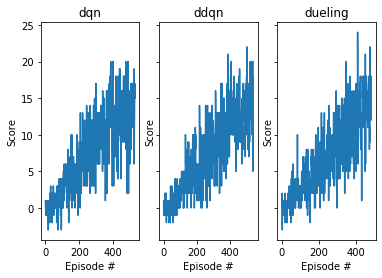

In [9]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row')

for i, update_type in enumerate(stats.keys()):
    scores = stats[update_type]
    
    # plot the scores
    tmp = ax[i]
    tmp.plot(np.arange(len(scores)), scores)
    tmp.set_title(update_type)
    tmp.set_ylabel('Score')
    tmp.set_xlabel('Episode #')

plt.savefig('scores.png'.format(update_type), bbox_inches='tight')
plt.show()

In [10]:
agents['dqn'].qnetwork_local.load_state_dict(torch.load('dqn.pth'))

In [11]:
state = env.reset()                                # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state)                      # select an action
    next_state, reward, done, env_info = env.step(action)        # send the action to the environment
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
#env.close()